In [1]:
import pandas as pd
import matplotlib.pyplot as plt


mcdonalds = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

# Display column names
print(mcdonalds.columns)

# Display dimensions
print(mcdonalds.shape)

# Display the first 3 rows
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [3]:


# Select columns 1 to 11 and convert "Yes" to 1 and "No" to 0
MD_x = mcdonalds.iloc[:, 0:11].apply(lambda x: (x == "Yes").astype(int))

# Calculate and round column means
means = MD_x.mean().round(2)

# Display the result
print(means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
from sklearn.decomposition import PCA


# Perform PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display summary
print("Importance of components:")
print("\n".join([f"PC{i} {s:.4f}" for i, s in enumerate(MD_pca.explained_variance_ratio_, 1)]))

print("\nCumulative Proportion:")
print("\n".join([f"PC{i} {sum(MD_pca.explained_variance_ratio_[:i]):.4f}" for i in range(1, len(MD_pca.explained_variance_ratio_)+1)]))


Importance of components:
PC1 0.2994
PC2 0.1928
PC3 0.1330
PC4 0.0831
PC5 0.0595
PC6 0.0503
PC7 0.0438
PC8 0.0395
PC9 0.0368
PC10 0.0324
PC11 0.0293

Cumulative Proportion:
PC1 0.2994
PC2 0.4922
PC3 0.6253
PC4 0.7084
PC5 0.7679
PC6 0.8182
PC7 0.8620
PC8 0.9016
PC9 0.9383
PC10 0.9707
PC11 1.0000


In [6]:

print("Standard deviations (1, .., p=11):")
print(MD_pca.explained_variance_**0.5)

# Display rotation matrix
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(MD_pca.components_, columns=MD_x.columns).round(2))


Standard deviations (1, .., p=11):
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Rotation (n x k) = (11 x 11):
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0   -0.48       -0.16  -0.01       0.12    0.30 -0.11  -0.34  -0.47   
1    0.36        0.02   0.02      -0.03   -0.06 -0.09  -0.61   0.31   
2   -0.30       -0.06  -0.04      -0.32   -0.80 -0.06  -0.15  -0.29   
3    0.06       -0.14   0.20      -0.35    0.25 -0.10   0.12  -0.00   
4   -0.31        0.28   0.07      -0.07    0.36  0.11  -0.13  -0.21   
5    0.17       -0.35  -0.36      -0.41    0.21 -0.59  -0.10  -0.08   
6   -0.28       -0.06   0.71      -0.39    0.04 -0.09  -0.04   0.36   
7    0.01       -0.11   0.38       0.59   -0.14 -0.63   0.14  -0.07   
8    0.57       -0.02   0.40      -0.16   -0.00  0.17   0.08  -0.64   
9   -0.11       -0.67  -0.08      -0.01    0.01  0.24   0.43   0.08   
10   0.05       -0.54   0.14  

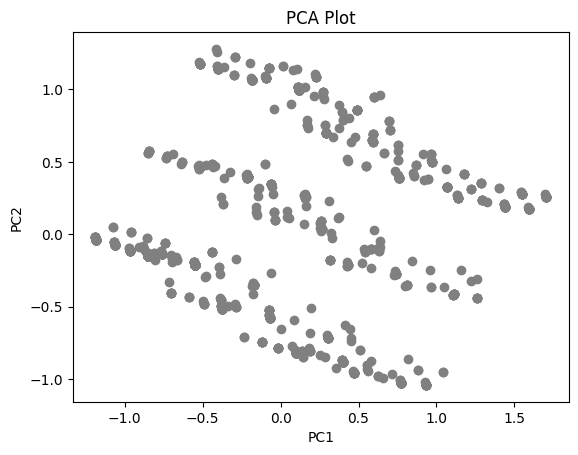

Projected Axes:
             PC1   PC2
yummy      -0.48  0.36
convenient -0.16  0.02
spicy      -0.01  0.02
fattening   0.12 -0.03
greasy      0.30 -0.06
fast       -0.11 -0.09
cheap      -0.34 -0.61
tasty      -0.47  0.31
expensive   0.33  0.60
healthy    -0.21  0.08
disgusting  0.37 -0.14


In [8]:
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

# Display projected axes
print("Projected Axes:")
print(pd.DataFrame(MD_pca.components_[:2, :].T, index=MD_x.columns, columns=['PC1', 'PC2']).round(2))

# Using Mixtures of Regression Models

In [26]:
import pandas as pd

# Assuming you have a DataFrame named "mcdonalds" with the column "Like"
# Replace this with your actual data
mcdonalds = pd.DataFrame({"Like": ["I hate it!"] * 152 + ["-4"] * 71 + ["-3"] * 73 + ["-2"] * 59 +
                                  ["-1"] * 58 + ["0"] * 169 + ["+1"] * 152 + ["+2"] * 187 +
                                  ["+3"] * 229 + ["+4"] * 160 + ["I love it!"] * 143})

# Reverse the order of "Like" and create a new variable "Like.n"
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].apply(lambda x: int(x) if x.lstrip('-').isdigit() else 0)

# Display the table for the new variable "Like.n"
print(mcdonalds['Like.n'].value_counts().sort_index())


Like.n
6     1192
7       58
8       59
9       73
10      71
Name: count, dtype: int64


# Profiling Segments

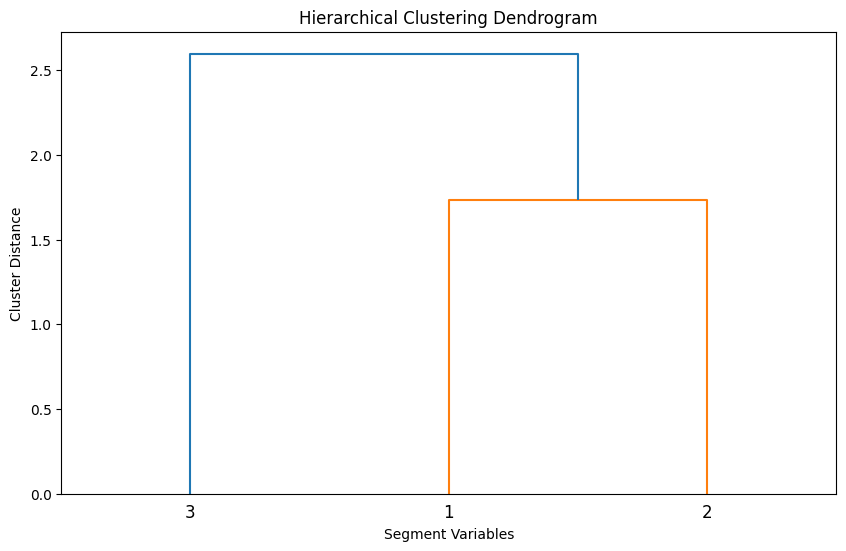

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Assuming MD.x is a numpy array or a pandas DataFrame
MD_x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Perform hierarchical clustering
MD_vclust = linkage(pdist(MD_x.T), method='average')

# Create the segment profile plot
plt.figure(figsize=(10, 6))

# Plot the dendrogram
dendrogram(MD_vclust, labels=range(1, MD_x.shape[1] + 1))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Segment Variables')
plt.ylabel('Cluster Distance')

# Show the plot
plt.show()
